### Actividad: Predicción de Diabetes con Regresión Logística

#### Objetivo de la actividad:

El objetivo de esta actividad es aplicar los conocimientos de regresión logística binaria para predecir si una persona padece diabetes o no, utilizando el diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_dataset diabetes.csv. Los alumnos deberán implementar todo el proceso desde la carga y preprocesamiento de los datos, hasta la evaluación del modelo, utilizando Python y las herramientas de `pandas` y `scikit-learn`.

#### Instrucciones:

1. Carga de datos:
    - Descarga el dataset desde Kaggle - [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_diabetes_dataset). La dataset tiene las siguientes columnas:
        - `Pregnancies`:  Número de embarazos
        - `Glucose`: el nivel de glucosa en sangre
        - `BloodPressure`: la medición de la presión arterial
        - `SkinThickness`: el grosor de la piel
        - `Insulin`: el nivel de insulina en sangre
        - `BMI`: el índice de masa corporal
        - `DiabetesPedigreeFunction`: el porcentaje de diabetes
        - `Age`: la edad
        - `Outcome`: el resultado final 1 es Sí y 0 es No

    - Carga el dataset en un DataFrame de pandas y realiza un análisis exploratorio, mostrando estadísticas básicas como la media, mediana y valores nulos. Genera también una matriz de correlación para analizar la relación entre las variables.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importar train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Importar LogisticRegression para crear y ajustar el modelo de regresión logística.
from sklearn.linear_model import LogisticRegression
# Importar  métricas para evaluar el rendimiento del modelo.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
diabetes_data = pd.read_csv('./Datos./diabetes.csv')

print(diabetes_data.head())

print('------------------\n')

print(diabetes_data.isnull().sum())

print('------------------\n')
#Verificar datos duplicados
print (f'Datos duplicados {diabetes_data.duplicated().sum()}')


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
------------------

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

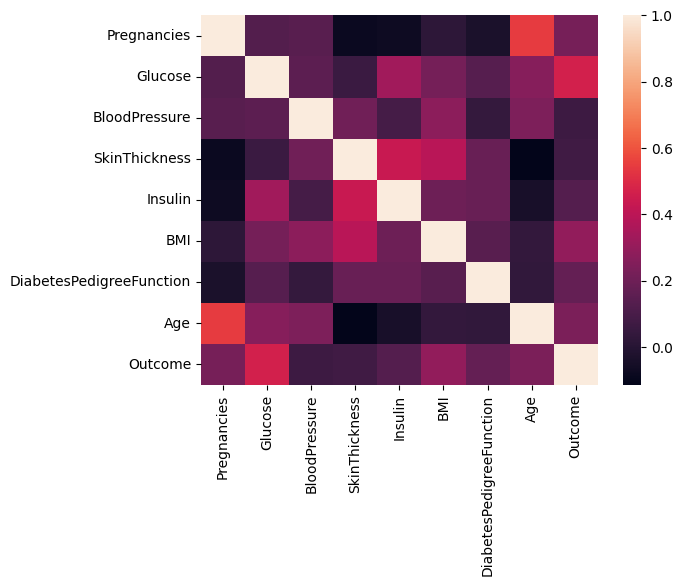

In [77]:
#Verificar correlación de las variables, eso se hace ocn la matriz de correlación de Persson

#corr() genera la matriz de correlación, solo deben de ser valores numéricos
matCorr = diabetes_data.corr(numeric_only= True)

#print(matCorr)
#filtrar correlaciones entre 0.6 y 1

#matCorrf = matCorr[(matCorr>= 0.6) & (matCorr<1)]

print(matCorr)
# Eliminar filas y columnas que quedaron completamente vacías (solo NaN)

#Desplegar grafico
sns.heatmap(matCorr)
plt.show()



2. Preprocesamiento de datos:
    - Si es necesario, realiza alguna limpieza en los datos, como manejo de valores faltantes.
    - Define la variable objetivo (`Outcome`), que indica si una persona tiene diabetes (si un paciente tiene diabetes (1) o no (0)), y las variables predictoras, tales como `Pregnancies`, `Glucose`, `BloodPressure`, entre otras. Cada integrante del equipo realizará un modelo diferente, la diferenica reside en la cantidad de variables indepenndientes consideradas, es decir:
        * un modelo con 2 variables independientes
        * un modelo con 3 variables independientes
        * un modelo con 4 variables independientes


In [78]:

#La variable objetivo es Outcome


#Selección de la variable dependiente e indpendiente

x1 = diabetes_data[['Glucose']] #debe ser en dos dimensiones

y = diabetes_data['Outcome'] #este debe de ser en una dimensión

x3 = diabetes_data[['Age']]

x2 = diabetes_data[['BMI']]

#MODELO 3 VARIABLES independientes
Xm3 = diabetes_data[['Glucose', 'Age', 'BMI']]



3. Modelado:
    - Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba) utilizando `train_test_split` de `sklearn.model_selection`.
    - Verificar que las clases estén balanceadas.
    - Aplica un modelo de regresión logística utilizando `LogisticRegression` de `sklearn.linear_model`.
    - Entrena el modelo con los datos de entrenamiento.


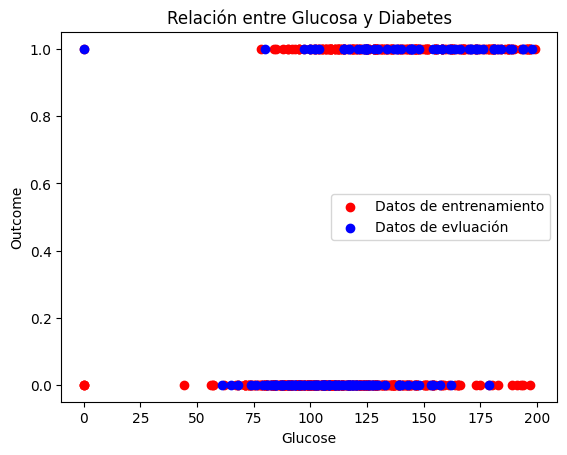

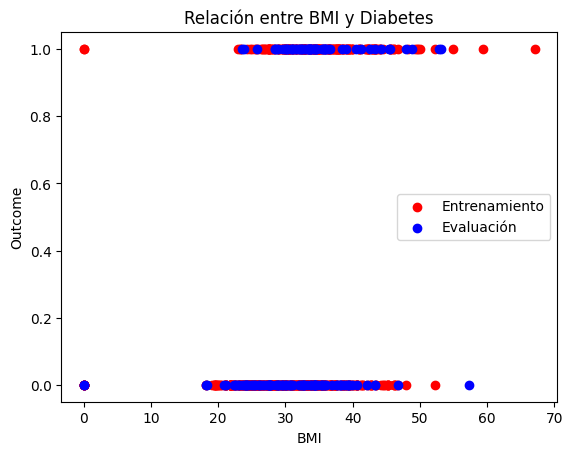

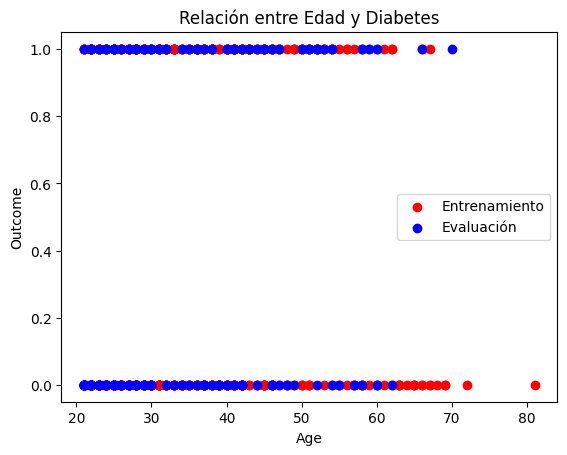

C:\Users\diego\AppData\Local\Temp\ipykernel_24728\304076634.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


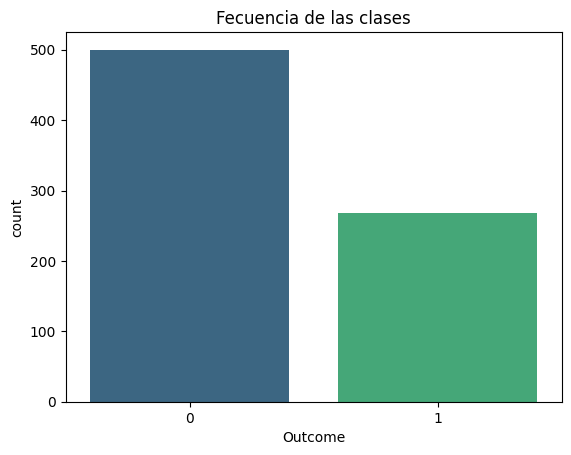

In [79]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x1, y, train_size=0.8, random_state=40)


#DECIDIMOS HACER LOS MODELADOS PRIMEROS DE UNA SOLA VARIABLE CON CADA VARIABLE INDEPENDIENTE CON LA VARIABLE OBKETIVO QUE ES OUTCOME
#ESTO CON EL FIN DE COMPRENDER EL EJERCICIO, Y POSTERIORMENTE HACERLOS COMO SE NOS PIDIÓ 

#Modelado con Glucose
X_train_glucose, X_test_glucose, y_train_glucose, y_test_glucose = train_test_split(x1, y, train_size=0.8, random_state=40)
plt.scatter(X_train, y_train, color = 'r', label = 'Datos de entrenamiento')
plt.scatter(X_test, y_test, color = 'b', label = 'Datos de evluación')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Relación entre Glucosa y Diabetes')
plt.legend()
plt.show()


# Modelo con BMI
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(x2, y, train_size=0.8, random_state=40)
plt.scatter(X_train_bmi, y_train_bmi, color='r', label='Entrenamiento')
plt.scatter(X_test_bmi, y_test_bmi, color='b', label='Evaluación')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('Relación entre BMI y Diabetes')
plt.legend()
plt.show()

# Modelo con Age
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(x3, y, train_size=0.8, random_state=40)
plt.scatter(X_train_age, y_train_age, color='r', label='Entrenamiento')
plt.scatter(X_test_age, y_test_age, color='b', label='Evaluación')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Relación entre Edad y Diabetes')
plt.legend()
plt.show()


#ESTO FUE PARA VER SI LAS CLASES ESTABAN BALANCEADAS

sns.countplot(x=y, palette='viridis')
plt.title('Fecuencia de las clases')
plt. show()

#MODELO 3 CON TRES INDEPENDIENTES
#dividimos los datos
X_trainm3, X_testm3, y_trainm3, y_testm3 = train_test_split(Xm3, y, train_size=0.8, random_state=40,)


In [80]:


#MODELO DE UNA SOLA VARIABLE INDEPENDIENTE Y LA VARIABLE OBJETIVO
#HECHOS POR EMILIO

#Decidí hacer un modelo para cada variable independiente que vamos a trabajar 

# Aquí instancié el modelo
modelo1 = LogisticRegression(max_iter=1000)
 # Entrenar con los datos de entrenamiento


modelo2 = LogisticRegression(max_iter=1000)
modelo3 = LogisticRegression(max_iter=1000)


modelo1.fit(X_train_glucose,y_train)
modelo2.fit(X_train_bmi,y_train)
modelo3.fit(X_train_age,y_train)


y_pred_glucose = modelo1.predict(X_test_glucose)
y_pred_bmi = modelo2.predict(X_test_bmi)
y_pred_age = modelo3.predict(X_test_age)

#MODELO CON 3 VARIABLES
#aplicamos el modelo
modeloL3 = LogisticRegression(max_iter=1000) 
#entrenamos el modelo
modeloL3.fit(X_trainm3, y_trainm3)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'



4. Evaluación del Modelo:
    - Realiza predicciones utilizando los datos de prueba.
    - Evalúa el rendimiento del modelo utilizando las siguientes métricas:
        - Exactitud (accuracy): `accuracy_score(y_test, y_pred)`
        - Matriz de confusión: `confusion_matrix(y_test, y_pred)`
        - Reporte de clasificación (classification report): `classification_report(y_test, y_pred)` 


In [81]:
#EVALUCIONES DE LOS MODELOS DE UNA VARIABLE

print("Modelo de glucosa y diabetes:")
print("Accuracy:", accuracy_score(y_test_glucose, y_pred_glucose))
print("Matriz de confusión:\n", confusion_matrix(y_test_glucose, y_pred_glucose))
print("Reporte de clasificación:\n", classification_report(y_test_glucose, y_pred_glucose))

#AL FINAL SOLO DEJÉ EL MODELO DE GLUCOSA Y DIABETES, PUES YA NO TENÍA CHISTE LA EVALUACIÓN DE LOS OTROS DOS MODELOS
#YA QUE SI LO HICE, PERO RESULTARON CON LOS MISMOS DATOS
"""
print("Modelo de BMI y diabetes:")
print("Accuracy:", accuracy_score(y_test_bmi, y_pred_bmi))
print("Matriz de confusión:\n", confusion_matrix(y_test_bmi, y_pred_bmi))
print("Reporte de clasificación:\n", classification_report(y_test_bmi, y_pred_bmi))

print("Modelo de Age y diabetes:")
print("Accuracy:", accuracy_score(y_test_age, y_pred_age))
print("Matriz de confusión:\n", confusion_matrix(y_test_age, y_pred_age))
print("Reporte de clasificación:\n", classification_report(y_test_age, y_pred_age))
"""

# Mdoelo de 2 variables
X_2vars = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_2vars, y, test_size=0.2, random_state=42)

model_2vars = LogisticRegression(max_iter=1000)
model_2vars.fit(X_train, y_train)

y_pred_2vars = model_2vars.predict(X_test)

print("Modelo con 2 variables:")
print("Accuracy:", accuracy_score(y_test, y_pred_2vars))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_2vars))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_2vars))

# MODELO 3 VARIABLES
print()
print("Evaluacion modelo de 3 variables")
y_predm3 = modeloL3.predict(X_testm3)
print("Accuracy:", accuracy_score(y_testm3, y_predm3))
print("Matriz de confusión:\n", confusion_matrix(y_testm3, y_predm3))
print("Reporte de clasificación:\n", classification_report(y_testm3, y_predm3))



Modelo de glucosa y diabetes:
Accuracy: 0.7597402597402597
Matriz de confusión:
 [[87  8]
 [29 30]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

Modelo con 2 variables:
Accuracy: 0.7662337662337663
Matriz de confusión:
 [[84 15]
 [21 34]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


Evaluacion modelo de 3 variables
Accuracy: 0.7922077922077922
Matriz de confusión:
 [[89  6]
 [26


5. Visualización:
    - Genera la matriz de confusión usando matplotlib y seaborn.


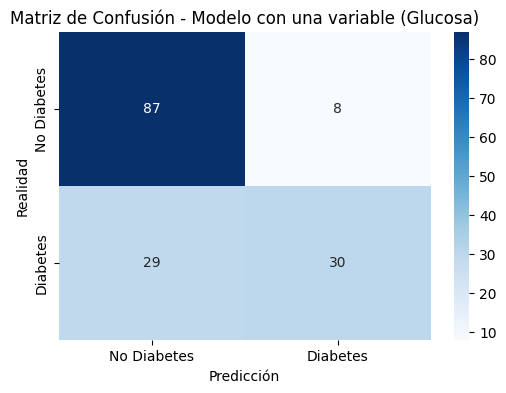

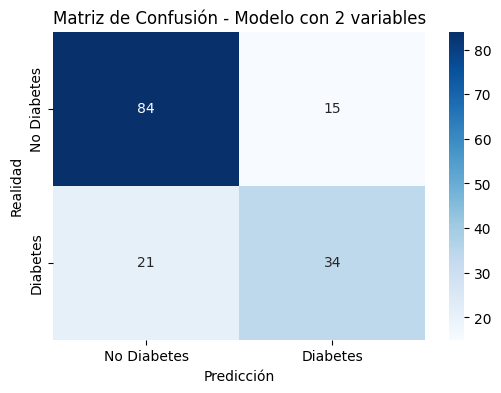


MODELO DE 3 VARIABLES


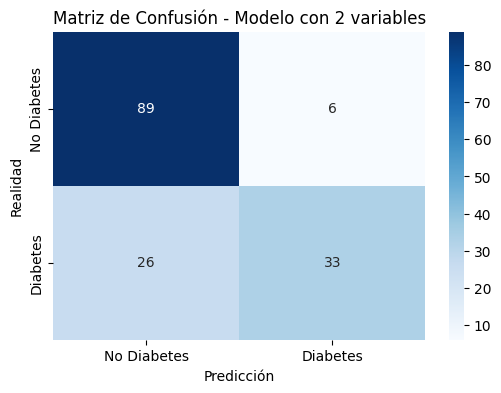

In [82]:
#MODELO DE UNA VARIABLE INDEPENDIENTE, EN ESTE CASO GLUCOSA

#se genera aquí la matriz de confusión

conf_matrix_one_var = confusion_matrix(y_test_glucose, y_pred_glucose)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_one_var, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Modelo con una variable (Glucosa)')
plt.show()

# Modelo de 2 varibales
# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_2vars)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Modelo con 2 variables')
plt.show()

#MODELO DE 3 VARIABLES
print()
print("MODELO DE 3 VARIABLES")
conf_matrixm3 = confusion_matrix(y_testm3, y_predm3)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixm3, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Modelo con 2 variables')
plt.show()


6. Conclusiones:
    - En función de los resultados obtenidos, ¿qué nivel de precisión alcanzaron los modelos evaluados? 
    - De los modelos comparados, ¿cuál fue el que obtuvo un mejor desempeño general? 
    - Respecto al modelo de mejor rendimiento, ¿cómo se interpreta su lógica de predicción? 